![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 项目三详解
- 可视化拓展

- ` 讲师个人主页：` www.zhang-ran.com

>- 开始录屏

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
df.genres = df.genres.astype(str)

genres_set = set()
for x in df['genres']: 
    genres_set.update(x.split('|')) 

In [8]:
for genres in genres_set:
    df[genres] = df['genres'].str.contains(genres).apply(lambda x:1 if x else 0)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Romance,Western,TV Movie,Animation,Drama,Music,Horror,Documentary,Crime,Family
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 根据你的需求筛选出数值类型的变量

df_corr = df[['runtime','popularity','vote_count','vote_average','budget_adj','budget_adj','revenue_adj']]

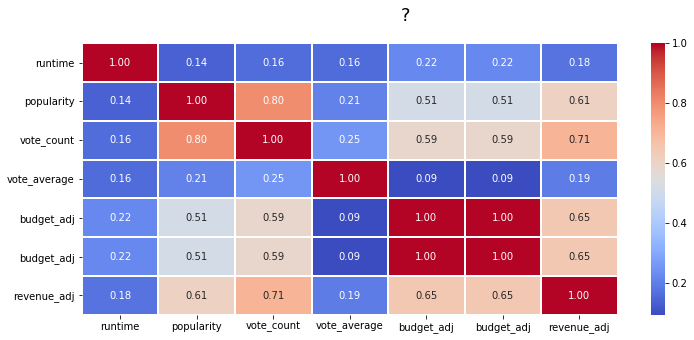

In [12]:
fig, ax = plt.subplots(figsize=(12, 5)) 

corr = df_corr.corr()
heatmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=1) 

fig.suptitle('?', fontsize=18)
plt.show();

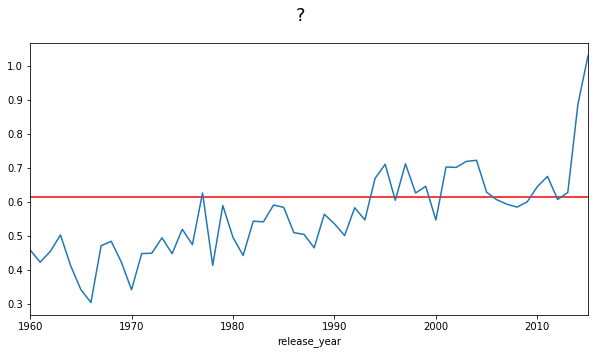

In [15]:
fig, ax = plt.subplots(figsize=(10, 5)) 

df.groupby('release_year')['popularity'].mean().plot(kind = 'line')
plt.hlines(df['popularity'].quantile(.7),xmin = 1960,xmax = 2015,color = 'red')
fig.suptitle('?', fontsize=18)

plt.show();

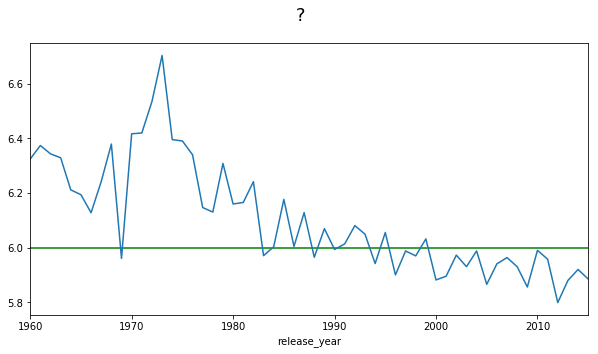

In [17]:
fig, ax = plt.subplots(figsize=(10, 5)) 

df.groupby('release_year')['vote_average'].mean().plot(kind = 'line')
plt.hlines(df['vote_average'].quantile(.5),xmin = 1960,xmax = 2015,color = 'green')

fig.suptitle('?', fontsize=18)
plt.show();

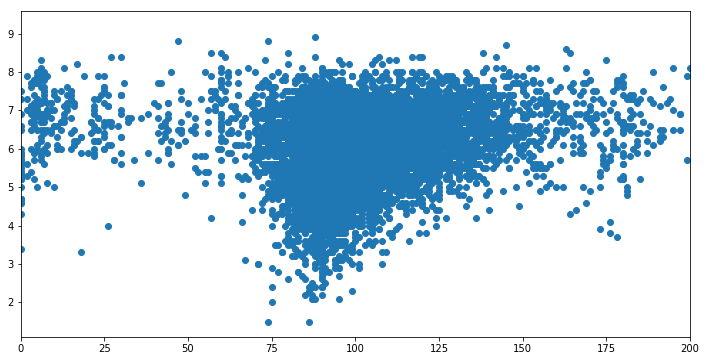

In [23]:
fig, ax = plt.subplots(figsize=(12, 6)) 
plt.scatter(df['runtime'], df['vote_average'])

plt.xlim(0, 200)
plt.show();

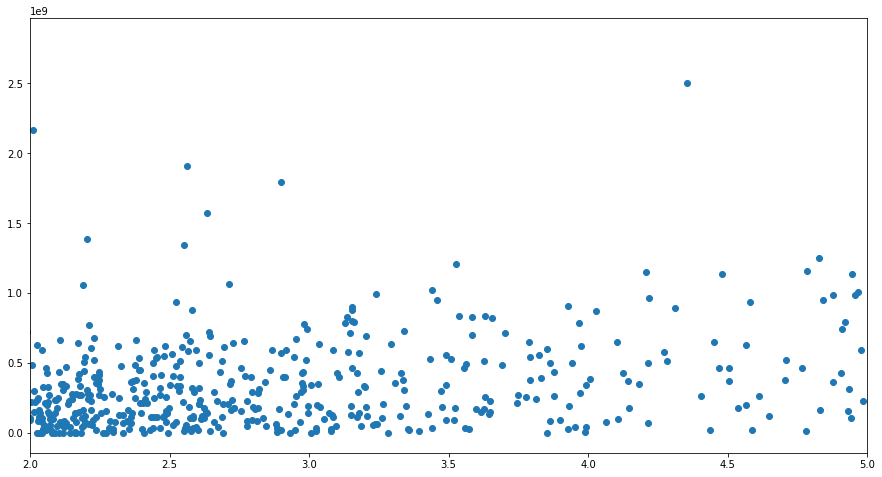

In [25]:
fig, ax = plt.subplots(figsize=(15, 8)) 

plt.scatter(df['popularity'], df['revenue_adj'])
plt.xlim(2, 5)

plt.show();

> 本周常见问题

In [28]:
wine = pd.read_csv("winequality_edited.csv")

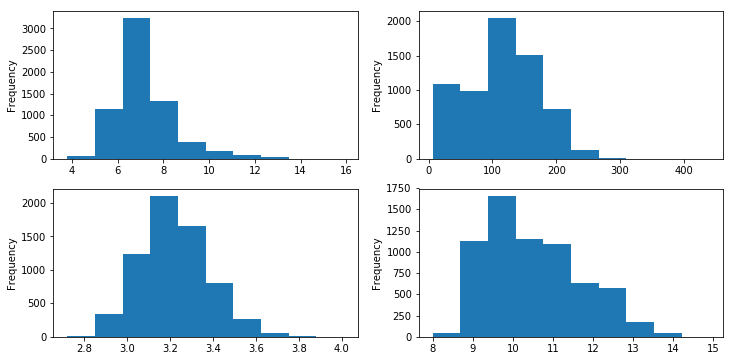

In [30]:
# 根据这个数据集中的列的直方图，哪个特征变量出现右偏态？

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

wine.fixed_acidity.plot.hist(ax=axs[0][0])

wine.total_sulfur_dioxide.plot.hist(ax=axs[0][1])

wine.pH.plot.hist(ax=axs[1][0])

wine.alcohol.plot.hist(ax=axs[1][1])

plt.show();

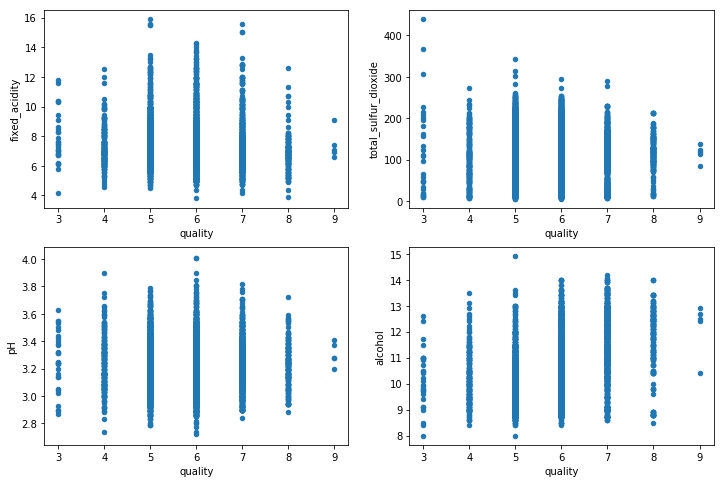

In [31]:
x = wine[["fixed_acidity", "total_sulfur_dioxide", "pH", "alcohol", "quality"]]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

x.plot.scatter(y='fixed_acidity', x='quality', ax=axs[0][0])
x.plot.scatter(y='total_sulfur_dioxide', x='quality', ax=axs[0][1])
x.plot.scatter(y='pH', x='quality', ax=axs[1][0])
x.plot.scatter(y='alcohol', x='quality', ax=axs[1][1])

plt.show();

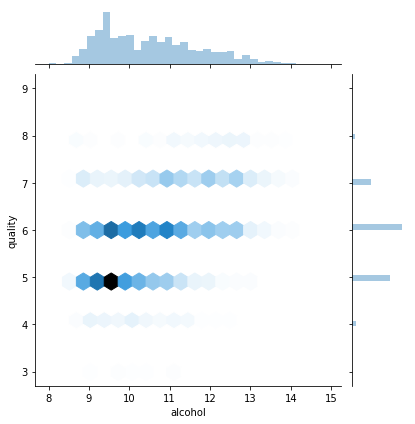

In [32]:
sns.jointplot(x='alcohol', y='quality', data=x, kind='hex', gridsize=20);

In [33]:
df_war = df[df['War'] == 1]
df_horror = df[df['Horror'] == 1]
num_war = df_war['id'].sum()
num_horror = df_horror['id'].sum()

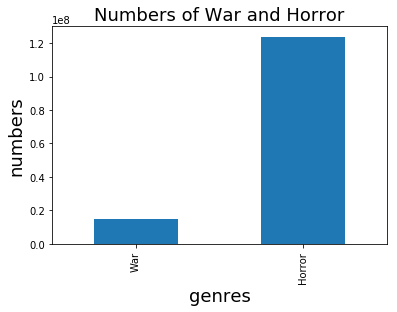

In [34]:
data = pd.Series((num_war, num_horror), index=('War', 'Horror'))
data.plot.bar()
plt.title('Numbers of War and Horror', fontsize =18)
plt.xlabel('genres', fontsize =18) 
plt.ylabel('numbers', fontsize =18) 
plt.show();

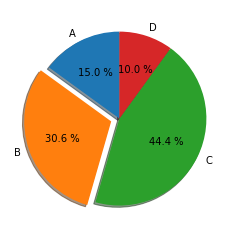

In [35]:
# 测试

labels = 'A', 'B', 'C', 'D'
fracs = [15, 30.55, 44.44, 10]

# 0.1 凸出这部分
explode = [0, 0.1, 0, 0] 

# set this , Figure is round, otherwise it is an ellipse
plt.axes(aspect=1)  

#autopct ，show percet
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90, pctdistance = 0.6)
plt.show();

> ## 拓展

In [36]:
# Load 'winequality_edited.csv'
df = pd.read_csv('winequality_edited.csv')
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [37]:
# 是不是酒精度越高，评分越高？

df[['alcohol','quality']].groupby('quality').describe()

alcohol                                                      
          count       mean       std   min     25%    50%   75%   max
quality                                                              
3          30.0  10.215000  1.106497   8.0   9.625  10.15  11.0  12.6
4         216.0  10.180093  0.985923   8.4   9.400  10.00  10.9  13.5
5        2138.0   9.837783  0.814416   8.0   9.300   9.60  10.3  14.9
6        2836.0  10.587553  1.126491   8.4   9.600  10.50  11.4  14.0
7        1079.0  11.386006  1.199337   8.6  10.625  11.40  12.3  14.2
8         193.0  11.678756  1.278921   8.5  11.000  12.00  12.6  14.0
9           5.0  12.180000  1.013410  10.4  12.400  12.50  12.7  12.9

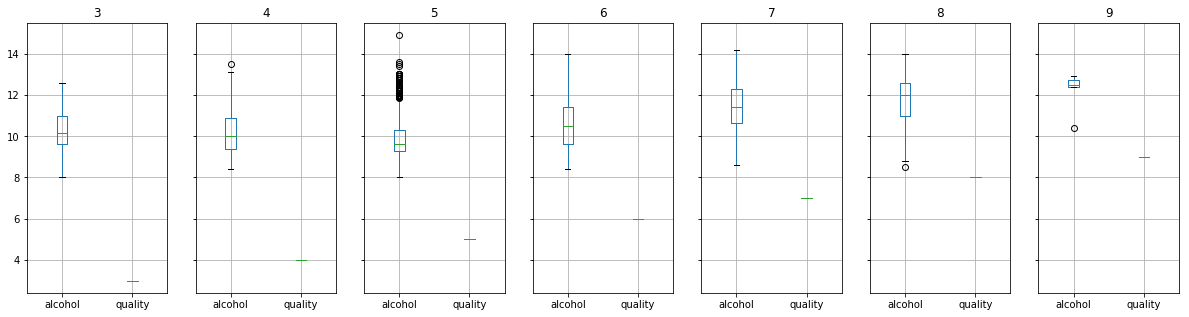

In [40]:
df[['alcohol','quality']].groupby('quality').boxplot(figsize = (20,5), layout = (1,7))
plt.show();

In [41]:
quality_range = [1,3,5,7,9]
rating = ['bad', 'ok', 'good', 'excellent']

In [42]:
df['rating'] = pd.cut(df.quality, quality_range, labels = rating)

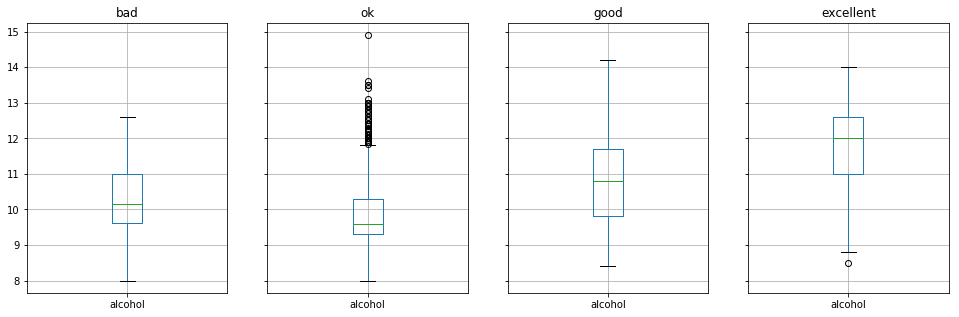

In [43]:
df[['alcohol', 'rating']].groupby('rating').boxplot(figsize = (16,5), layout = (1,4))
plt.show();

In [48]:
# 红白酒哪个酸度强的比例多

print(df.pH.describe())
pH_range = [2.71, 3.11, 3.32, 4.1]
pH_rating = ['strong acid', 'median acid', 'weak acid']
df['pH_rating'] = pd.cut(df.pH, pH_range, labels = pH_rating)

groupby = df[['color','pH_rating']].groupby('color')['pH_rating'].value_counts()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64


In [49]:
(groupby.red/groupby.red.sum())['strong acid'], (groupby.white/groupby.white.sum())['strong acid']

(0.08943089430894309, 0.32155982033483055)

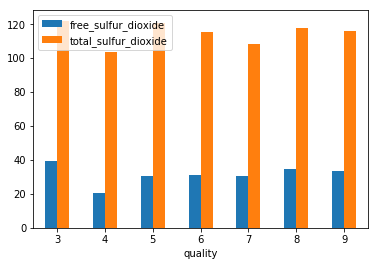

In [50]:
groupby = df[['quality','free_sulfur_dioxide','total_sulfur_dioxide']].groupby('quality').mean()
groupby.plot(kind = 'bar', 
             rot = 0, 
             stacked = False)
plt.show();

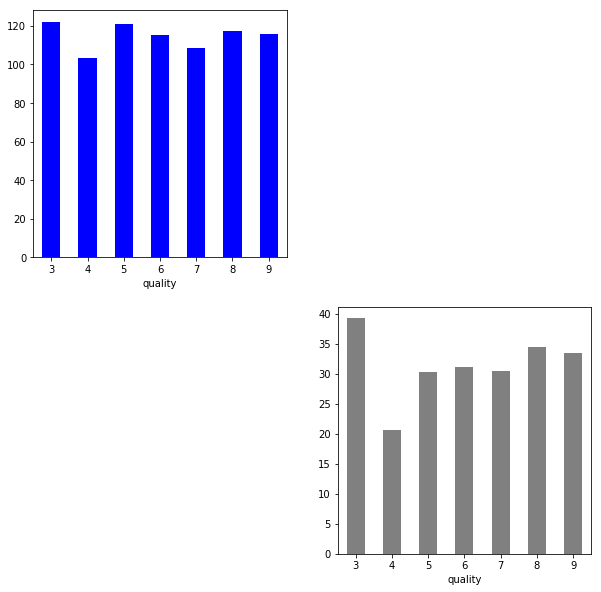

In [51]:
# 多图位置练习

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(224)

groupby.total_sulfur_dioxide.plot.bar(rot = 0,
                                      color = 'blue',
                                      ax = ax1)

groupby.free_sulfur_dioxide.plot.bar(rot = 0,
                                     color = 'grey',
                                     ax = ax2)

plt.show();

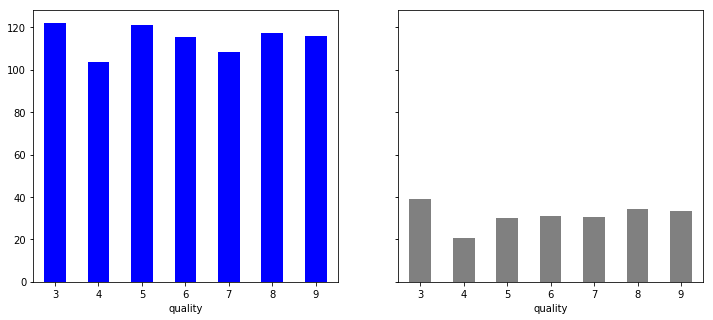

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (12,5))

groupby.total_sulfur_dioxide.plot.bar(rot = 0,
                                      color = 'blue',
                                      ax = ax1)

groupby.free_sulfur_dioxide.plot.bar(rot = 0,
                                     color = 'grey',
                                     ax = ax2)

plt.show();

In [55]:
# 子图输出练习

ind = np.arange(len(groupby.free_sulfur_dioxide)) # the x locations for the groups
width = 0.35  # the width of the bars

ind, width

(array([0, 1, 2, 3, 4, 5, 6]), 0.35)

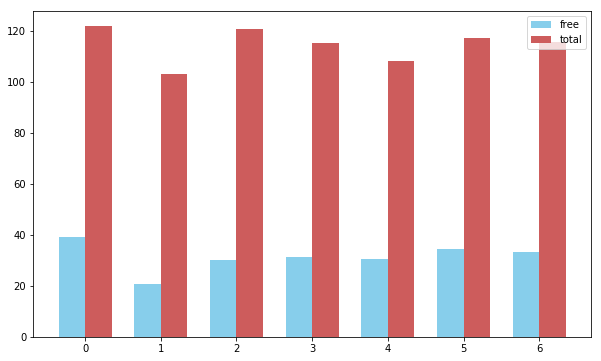

In [56]:
fig, ax = plt.subplots(figsize = (10,6))

rects1 = ax.bar(ind - width/2,
                groupby.free_sulfur_dioxide, 
                width,
                color='SkyBlue', 
                label='free')

rects2 = ax.bar(ind + width/2, 
                groupby.total_sulfur_dioxide.values, 
                width,
                color='IndianRed', 
                label='total')
plt.legend()
plt.show();